# 이변량_범주 vs 숫자

In [2]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


---

# 1. 시각화
- titanic data에서 Age를 Y로 두고 비교해 봅시다.

### 1) 평균 비교: barplot

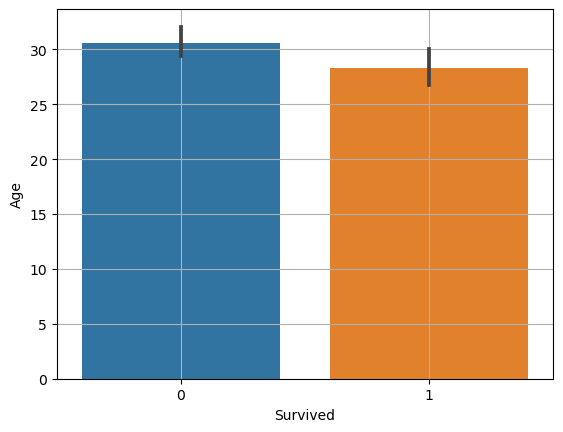

In [4]:
# x='Survived', y='Age'
sns.barplot(x='Survived', y='Age', data=titanic)
plt.grid()
plt.show()

In [5]:
# 'Survived','Age'에 대해 상위 10개 행 보여주기
titanic.loc[:10, ['Survived','Age']]

,Survived,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0
5,0,NaN
6,0,54.0
7,0,2.0
8,1,27.0
9,1,14.0


### 2) boxplot

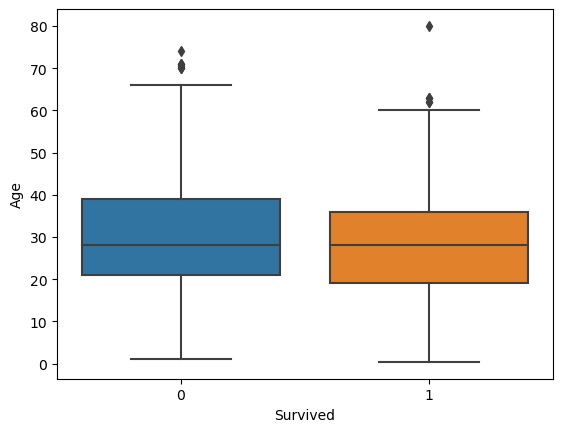

In [6]:
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.show()

$ $

$ $

# 2. 수치화

### 1) t-test
두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 **NaN**이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

 `1) 일표본 t-검정`
 - 단일모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교
 - 알고자하는 값이 종속변수(연속변수)
 - 설정한 기준값과 종속변수의 평균값 사이의 차이가 통계적으로 유의하다면 두 값이 다르다고 결론을 내림.
 - 모집단의 구성요소들이 정규분포를 이룬다는 가정
    
    - 1단계: 가설설정
    - 2단계: 유의수준 설정
    - 3단계: 검정통계량의 값 및 유의확률 계산
    - 4단계: 기각여부 판단 및 의사결정
    
    
    

`2. 대응표본 t-검정`
- 단일모집단에 대해 두 번의 처리를 가했을 때, 두개의 처리에 따른 평균의 차이를 비교
- 쌍(pair)로 이루어져 있어 찍지어진 t-검정이라고 함.
- 모집단의 관측값이 정규성을 만족한다는 가정
    - 1단계: 가설검정
    - 2단계: 유의수준 설정
    - 3단계: 검정통계량의 값 및 유의확률 계산
    - 4단계: 기각여부 판단 및 의사결정


`3. 독립표본 t-검정`
- 두 개의 독립된 모집단의 평균을 비교
- ex) 성별에 따라 출근 준비시간에 차이가 있니?
    - '성별'이 독립변수, 관측값인 '출근 준비시간'이 종속변수
- 정규성 만족, 두 개의 모집단은 서로 독립, 등분산성 가정을 만족
    - 1단계: 가설검정
    - 2단계: 유의수준 설정
    - 3단계: 등분산 검정
    - 4단계: 검정통계량의 값 및 유의확률 계산
    - 5단계: 기각여부 판단 및 의사결정
    

In [7]:
# NaN 확인
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# NaN 행 제외
tita_n = titanic.loc[titanic['Age'].notnull()]

In [9]:
# 두 그룹으로 데이터 저장
died = tita_n.loc[tita_n['Survived']==0, 'Age']
survived = tita_n.loc[tita_n['Survived']==1, 'Age']

In [10]:
# t-test
spst.ttest_ind(died, survived)

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

In [ ]:
# t값은 2보다 크기에 차이가 있다고 말할 수 있다.
# p-value는 0.039로 0.05보다 작기 때문에 통계적으로 유의미하다고 말할 수 있다.

$ $

$ $

---

### 2) ANOVA
* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

- 두 개 이상의 집단들의 평균 간 차이

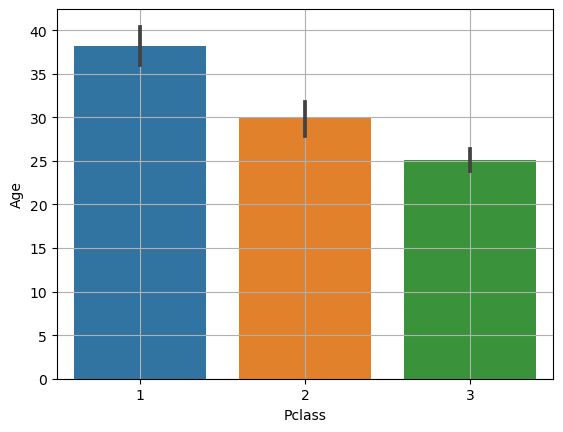

In [12]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

In [13]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

In [14]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)